# Atención sanitaria

# Objetivo

El objetivo de este proyecto es analizar cómo el tipo de admisión, la condición médica del paciente y el proveedor de seguros influyen en los costos de facturación y la duración de la estancia hospitalaria. Además, se busca determinar si estas variables tienen un impacto significativo independientemente de factores como la edad, el género y el tipo de sangre. El análisis pretende identificar patrones que permitan optimizar la gestión hospitalaria y mejorar la asignación de recursos en función de las características de los pacientes.

Hipótesis

El tipo de admisión de los pacientes, junto con su condición médica y su proveedor de seguros, influye significativamente en el monto de facturación final y la duración de la estancia hospitalaria, independientemente de la edad, el género y el tipo de sangre.


# Información sobre los datos

El dataset fue tomado de Kaggle. Este conjunto de datos consta de 10.000 registros, cada uno de los cuales representa un historial clínico del paciente. Cada columna proporciona información específica sobre el paciente, su ingreso y los servicios de atención médica brindados; También inlcuye datos demográficos del paciente, detalles de admisión y más.

# Descripción del dataset
Variables:

Nombre: Esta columna representa el nombre del paciente asociado al registro de atención médica.

Edad: La edad del paciente en el momento del ingreso, expresada en años.

Género: Indica el género del paciente, ya sea “Masculino” o “Femenino”.

Tipo de sangre: El tipo de sangre del paciente, que puede ser uno de los tipos de sangre comunes (por ejemplo, "A+", "O-", etc.).

Condición médica: esta columna especifica la condición médica principal o el diagnóstico asociado con el paciente, como "Diabetes", "Hipertensión", "Asma" y más.

Fecha de ingreso: Fecha en la que el paciente fue admitido en el centro de atención médica.

Médico: Nombre del médico responsable de la atención del paciente durante su ingreso.

Hospital: Identifica el centro de salud u hospital donde fue ingresado el paciente.

Proveedor de seguros: esta columna indica el proveedor de seguros del paciente, que puede ser una de varias opciones, incluidas "Aetna", "Blue Cross", "Cigna", "UnitedHealthcare" y "Medicare".

Monto de facturación: cantidad de dinero facturada por los servicios de atención médica del paciente durante su ingreso. Se expresa como un número de punto flotante.

Número de habitación: El número de habitación donde fue alojado el paciente durante su ingreso.

Tipo de admisión: especifica el tipo de admisión, que puede ser "Emergencia", "Electiva" o "Urgente", reflejando las circunstancias de la admisión.

Fecha de alta: La fecha en la que el paciente fue dado de alta del centro de atención médica, según la fecha de ingreso y un número aleatorio de días dentro de un rango realista.

Medicación: identifica una medicación prescrita o administrada al paciente durante su ingreso. Algunos ejemplos son "aspirina", "ibuprofeno", "penicilina", "paracetamol" y "lipitor".

Resultados de la prueba: describe los resultados de una prueba médica realizada durante el ingreso del paciente. Los valores posibles incluyen "Normal", "Anormal" o "No concluyente", lo que indica el resultado de la prueba.

# Importación de librerías y lectura de datos

Se importan las librerías que utilizaremos durante el proyecto, se leen y guardan los datos.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np


**Se importan librerías que se usan en el proyecto.**

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/MyDrive/Bases de datos/Healthcare'

/content/gdrive/MyDrive/Bases de datos/Healthcare


In [ ]:
import pandas as pd

Se imprimen las primeras observaciones del dataset

In [ ]:
df= pd.read_csv ('healthcare_dataset.csv', delimiter= ';')
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,31/01/2024,Matthew Smith,Sons and Miller,Blue Cross,"18856300000000000,00",328,Urgent,2/02/2024,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,20/08/2019,Samantha Davies,Kim Inc,Medicare,"33643300000000000,00",265,Emergency,26/08/2019,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,22/09/2022,Tiffany Mitchell,Cook PLC,Aetna,"27955100000000000,00",205,Emergency,7/10/2022,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,18/11/2020,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,"3790980000000000,00",450,Elective,18/12/2020,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,19/09/2022,Kathleen Hanna,White-White,Aetna,"14238300000000000,00",458,Urgent,9/10/2022,Penicillin,Abnormal


In [ ]:
num_filas, num_columnas = df.shape
print(f"Número de filas: {num_filas}, Número de columnas: {num_columnas}")


Número de filas: 9999, Número de columnas: 15


El dataset contiene 9999 observaciones y 15 variables.

#Limpieza y preprocesamiento de datos

Se realizan los siguientes pasos:
- Eliminación de columnas que no aportan información relevante.
- Eliminación de mayusculas en los nombres de los pacientes.
- Busqueda de N/A.
- Normalización del género.
- Limpieza del monto de facturación.
- Rellenar valores numéricos.

En primer lugar se eliminan las variables que no serán usadas para el análisis ni el modelado.

In [ ]:
todrop = ['Doctor', 'Room Number', 'Medication', 'Test Results', 'Hospital']
df = df.drop(columns = todrop)

Se eliminan mayúsculas en los nombres de los pacientes.

In [ ]:
# Convertir la primera letra a mayúscula y el resto a minúsculas en la columna 'Name'
df['Name'] = df['Name'].str.capitalize()



Se buscan posibles valores nulos.

In [ ]:
df.isnull().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Insurance Provider,0
Billing Amount,0
Admission Type,0
Discharge Date,0


No se encuentran valores nulos en el dataset.

Se normalizo el genero en el dataset.

In [ ]:
df['Gender'] = df['Gender'].str.capitalize()

Se busca eliminar comas y ceros adicionales.

In [ ]:
df['Billing Amount'] = df['Billing Amount'].astype(str).str.replace(',', '').str.replace('00000000000000', '').astype(float)

In [ ]:
df['Billing Amount'] = pd.to_numeric(df['Billing Amount'], errors='coerce')

In [ ]:
pd.options.display.float_format = '{:,.0f}'.format

In [ ]:
print(df['Billing Amount'].head())

0   1,885,630,000,000,000,000
1   3,364,330,000,000,000,000
2   2,795,510,000,000,000,000
3     379,098,000,000,000,000
4   1,423,830,000,000,000,000
Name: Billing Amount, dtype: float64


 Se busca rellenar con la media los valores numéricos.

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [56]:
df['Discharge Date'].bfill(inplace=True)

In [ ]:
df.head(10)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Admission Type,Discharge Date
0,Bobby jackson,30,Male,B-,Cancer,31/01/2024,Blue Cross,"1,885,630,000,000,000,000",Urgent,2/02/2024
1,Leslie terry,62,Male,A+,Obesity,20/08/2019,Medicare,"3,364,330,000,000,000,000",Emergency,26/08/2019
2,Danny smith,76,Female,A-,Obesity,22/09/2022,Aetna,"2,795,510,000,000,000,000",Emergency,7/10/2022
3,Andrew watts,28,Female,O+,Diabetes,18/11/2020,Medicare,"379,098,000,000,000,000",Elective,18/12/2020
4,Adrienne bell,43,Female,AB+,Cancer,19/09/2022,Aetna,"1,423,830,000,000,000,000",Urgent,9/10/2022
5,Emily johnson,36,Male,A+,Asthma,20/12/2023,UnitedHealthcare,"481,451,000,000,000,000",Urgent,24/12/2023
6,Edward edwards,21,Female,AB-,Diabetes,3/11/2020,Medicare,"195,809,000,000,000,000",Emergency,15/11/2020
7,Christina martinez,20,Female,A+,Cancer,28/12/2021,Cigna,"458,205,000,000,000,000",Emergency,7/01/2022
8,Jasmine aguilar,82,Male,AB+,Asthma,1/07/2020,Cigna,"5,011,920,000,000,000,000",Elective,14/07/2020
9,Christopher berg,58,Female,AB-,Cancer,23/05/2021,UnitedHealthcare,"197,846,000,000,000,000",Elective,22/06/2021


#Análisis exploratorio de datos


En este apartado, se busca estudiar la relación entre variables haciendo uso de gráficos. Por otra parte, se realizan modificaciones pertinentes en el dataset cuando se consideran necesarias.
Los nombres de cada categoria se obtuvieron de la página de kaggle, citado en la sección "Descripción del dataset".

In [ ]:
df.head(10)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Insurance Provider,Billing Amount,Admission Type,Discharge Date
0,Bobby jackson,30,Male,B-,Cancer,31/01/2024,Blue Cross,"1,885,630,000,000,000,000",Urgent,2/02/2024
1,Leslie terry,62,Male,A+,Obesity,20/08/2019,Medicare,"3,364,330,000,000,000,000",Emergency,26/08/2019
2,Danny smith,76,Female,A-,Obesity,22/09/2022,Aetna,"2,795,510,000,000,000,000",Emergency,7/10/2022
3,Andrew watts,28,Female,O+,Diabetes,18/11/2020,Medicare,"379,098,000,000,000,000",Elective,18/12/2020
4,Adrienne bell,43,Female,AB+,Cancer,19/09/2022,Aetna,"1,423,830,000,000,000,000",Urgent,9/10/2022
5,Emily johnson,36,Male,A+,Asthma,20/12/2023,UnitedHealthcare,"481,451,000,000,000,000",Urgent,24/12/2023
6,Edward edwards,21,Female,AB-,Diabetes,3/11/2020,Medicare,"195,809,000,000,000,000",Emergency,15/11/2020
7,Christina martinez,20,Female,A+,Cancer,28/12/2021,Cigna,"458,205,000,000,000,000",Emergency,7/01/2022
8,Jasmine aguilar,82,Male,AB+,Asthma,1/07/2020,Cigna,"5,011,920,000,000,000,000",Elective,14/07/2020
9,Christopher berg,58,Female,AB-,Cancer,23/05/2021,UnitedHealthcare,"197,846,000,000,000,000",Elective,22/06/2021


#Distribución

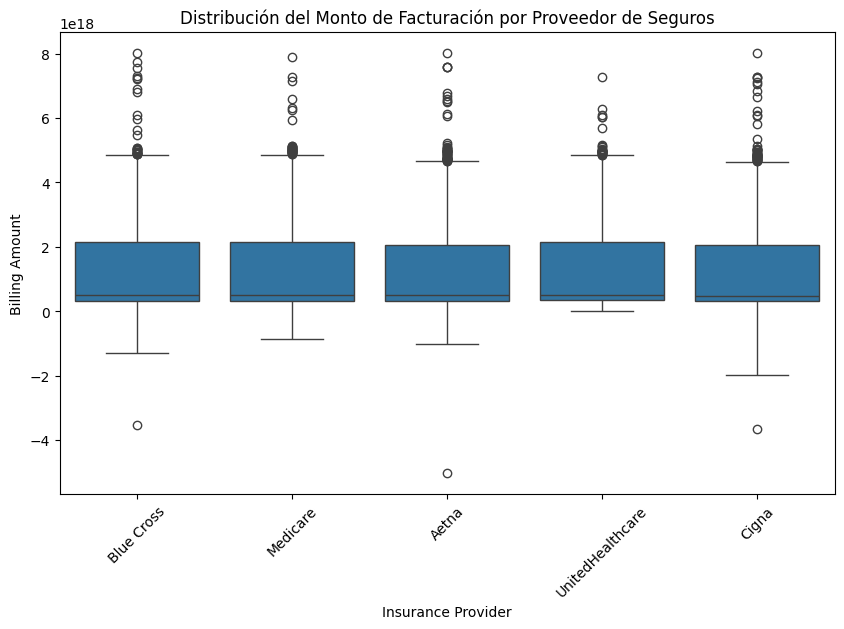

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Insurance Provider', y='Billing Amount', data=df)
plt.title('Distribución del Monto de Facturación por Proveedor de Seguros')
plt.xlabel('Insurance Provider')
plt.ylabel('Billing Amount')
plt.xticks(rotation=45)
plt.show()

Los montos de facturación son parecidos entre los proveedores de seguros, pero destacan valores atípicos en cada grupo. Los casos con facturaciones significativamente altas podrían estar vinculados a procedimientos costosos o situaciones médicas especiales, mientras que los valores negativos atípicos podrían reflejar ajustes o correcciones en la facturación.







#Estancia del paciente por tipo de admisión

In [36]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], format='%d/%m/%Y')
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], format='%d/%m/%Y')

In [ ]:
df['Duración de Estancia'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

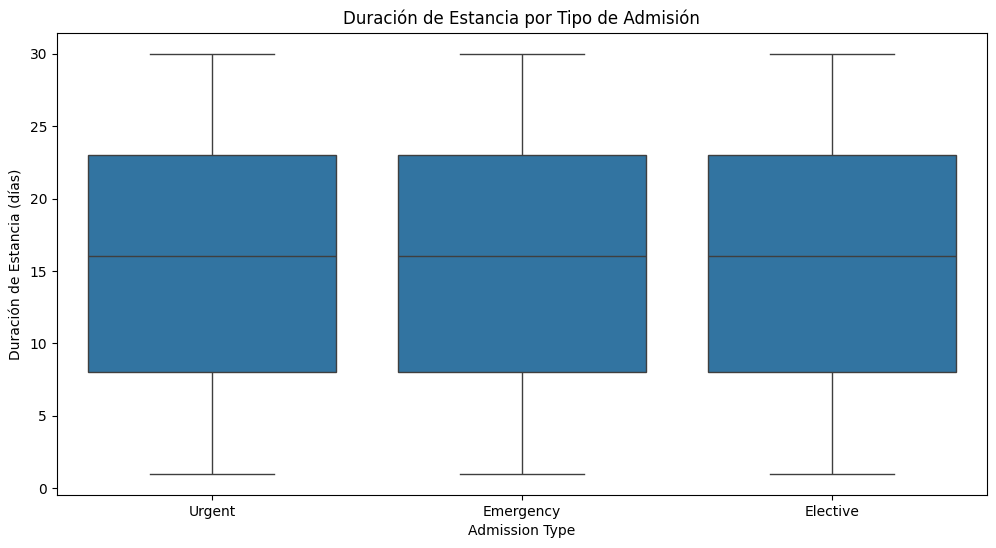

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Admission Type', y='Duración de Estancia', data=df)
plt.title('Duración de Estancia por Tipo de Admisión')
plt.xlabel('Admission Type')
plt.ylabel('Duración de Estancia (días)')
plt.show()

El tipo de admisión no parece influir de manera significativa en la duración de la estancia hospitalaria, ya que los tres grupos presentan una distribución de días muy similar.

#Impacto de Condición Médica, Seguro y Tipo de Admisión en Facturación

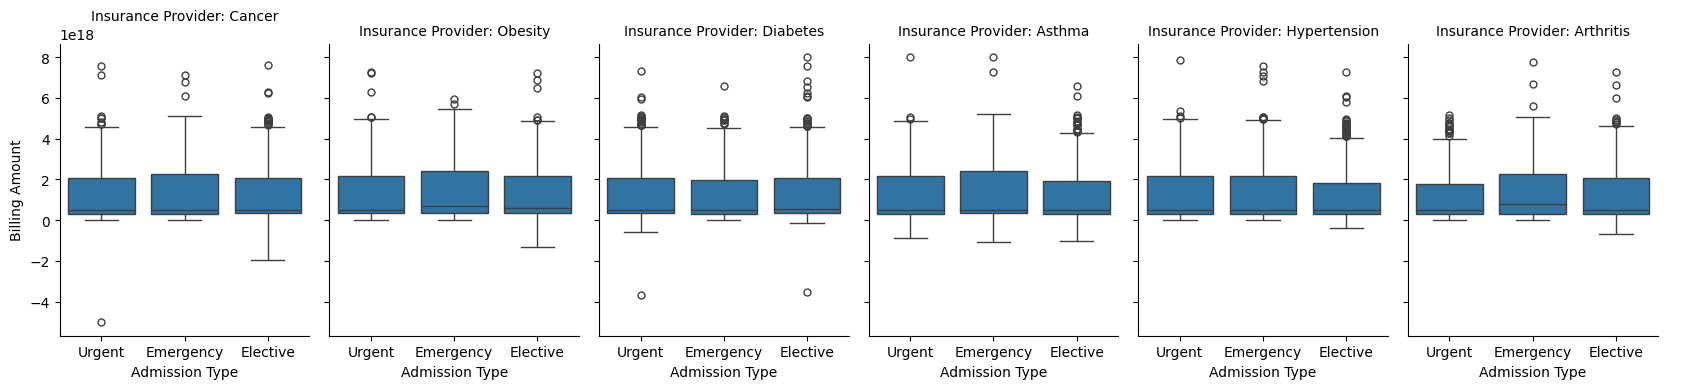

In [ ]:
g = sns.catplot(x='Admission Type', y='Billing Amount', col='Medical Condition', data=df, kind='box', height=4, aspect=0.7)
g.set_axis_labels('Admission Type', 'Billing Amount')
g.set_titles(col_template='Insurance Provider: {col_name}')
plt.show()

Los montos de facturación son similares entre los tipos de admisión, pero hay outliers en Cáncer, Diabetes, Hipertensión y Artritis. Esta variabilidad en costos puede estar ligada a la gravedad del caso, la urgencia del tratamiento o el uso de procedimientos especializados en ciertos tipos de admisión.


#Facturación

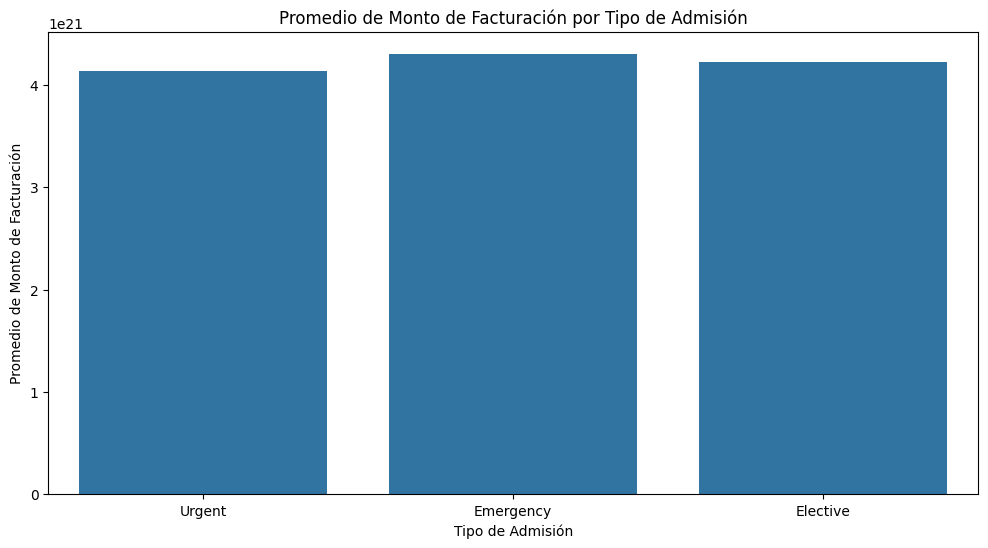

In [ ]:

plt.figure(figsize=(12, 6))
sns.barplot(x='Admission Type', y='Billing Amount', data=df, estimator=sum, errorbar=None)
plt.title('Promedio de Monto de Facturación por Tipo de Admisión')
plt.xlabel('Tipo de Admisión')
plt.ylabel('Promedio de Monto de Facturación')
plt.show()


Los montos promedio de facturación son prácticamente iguales entre las admisiones urgentes, de emergencia y electivas. Esto sugiere que el tipo de admisión no influye significativamente en los costos médicos, manteniendo una consistencia en los montos facturados.

#Media

In [ ]:
mean_cost = df.groupby('Insurance Provider')['Billing Amount'].mean().reset_index()

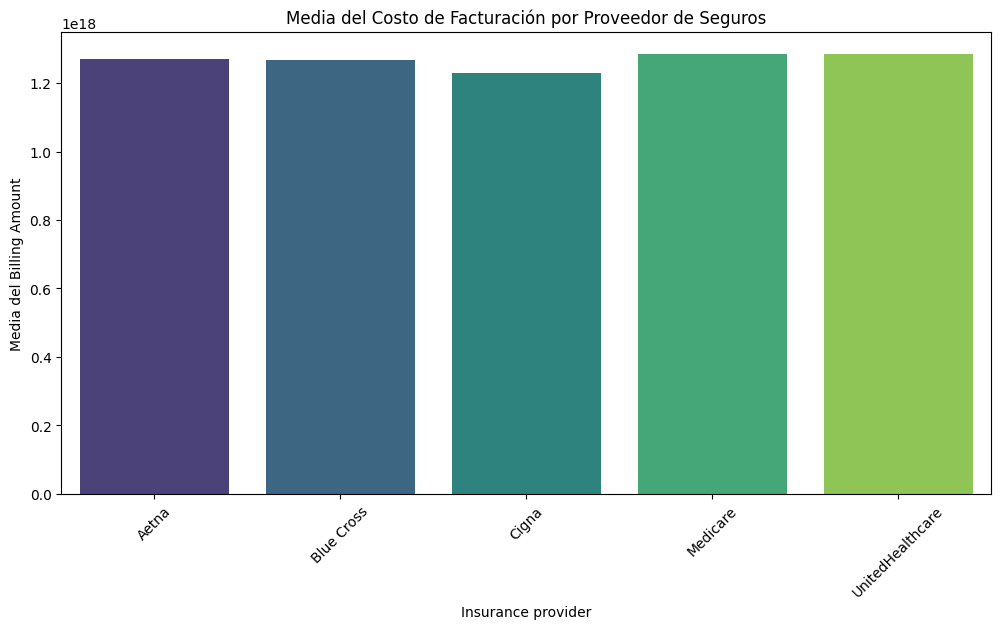

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Insurance Provider', y='Billing Amount', data=mean_cost, hue='Insurance Provider', palette='viridis', legend=False)
plt.title('Media del Costo de Facturación por Proveedor de Seguros')
plt.xticks(rotation=45)
plt.ylabel('Media del Billing Amount')
plt.xlabel('Insurance provider')
plt.show()

Los costos de facturación son similares entre los proveedores de seguros, con variabilidad limitada en los promedios.